In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [33]:
# get the data (doesnt matter what, we are just demonstrating fourier transforms
# will use training data -> largest sample size
df = pd.read_csv("exoData/exoTrain.csv")
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


## Fourier Transforms Recap

Much like a Taylor series, which is $\forall f(x)$,
$$
f(x) = \sum_{n=1}^\infty{\frac{(x-a)^n}{n!}\frac{\partial^n f}{\partial x^2}(a)}
$$
A Fourier series is the same idea. Instead of any $f(x)$ being a sum of infinitely many polynomials, it can also be expressed as a sum of infinitely many sine (equivalently, cosine) waves.
$$
f(x) = \frac12 a_0 + \sum_{n=1}^\infty {a_n \cos{nx} + b_n \sin{nx}}
$$

Where

$$
a_m = \frac1\pi \int_{-\pi}^\pi {f(x)\cos{nx}\text{ }dx} $$ $$
b_m = \frac1\pi \int_{-\pi}^\pi {f(x)\sin{nx}\text{ }dx}
$$

Though, the complex forms of the FTs are both more useful and easier to remember. They are also how the SciPy 1d Fourier analysis packages are coded (https://docs.scipy.org/doc/scipy/tutorial/fft.html)

The Fourier transform is derived from this idea, and enables us to 'deconstruct' a signal into its components. This is especially usefil when looking at the lightcurves we have.

In [34]:
# Plot a lightcurve again, but globally define dictionaries first
# Label dictionary
label_dict = {
    2: "Exoplanet",
    1: "No Exoplanet"
}

# Colour dictionary
c_label = {
    2: "blue",
    1: "red"
}

def plot_lc_idx(df, idx): # Takes the data and the star we want to plot
    flux = df.iloc[idx]
    
    label = flux["LABEL"] # isolate labels
    flux = flux.drop(["LABEL"]) # get flux array

    # arbitrary timesteps
    time = np.arange(len(flux))
    
    plt.figure(figsize=(8,6))
    plt.plot(time, flux, linewidth=1, c=c_label[label])
    plt.title(f"LC of star {idx + 1}, Class: {label_dict[label]}")
    plt.ylabel("Flux [Apparent Magnitude]")
    plt.xlabel("Time steps")
    plt.tight_layout()
    plt.show()

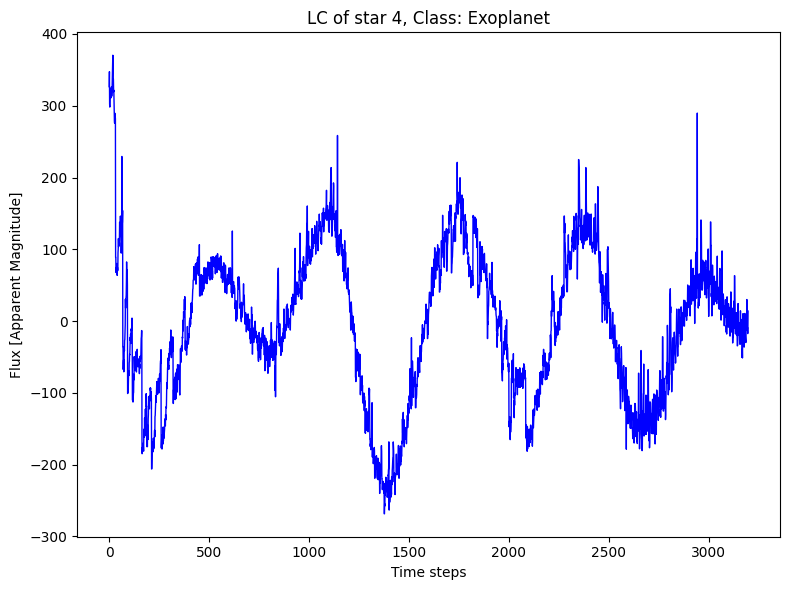

In [35]:
plot_lc_idx(df, 3)

In [36]:
# Let's put the FTs into practise...
from scipy.fft import fft, ifft # fourier and inverse fourier transforms

# Star 4
# we have time-domain data, and we want to analyse frequency-domain data, so we use fft not ifft
x = df.iloc[3]
y = fft(x)
y

array([-14853.14          -0.j        ,   4749.18630732-11429.9978728j ,
       -24006.09813691-23015.64219746j, ...,
        35604.89370942-59215.49634667j, -24006.09813691+23015.64219746j,
         4749.18630732+11429.9978728j ], shape=(3198,))

In [37]:
from scipy.fft import fft, fftfreq, rfft

def plot_fft_lc(df, idx):

    # as before ->
    flux = df.iloc[idx]
    label = flux["LABEL"] # isolate labels
    flux = flux.drop(["LABEL"]) # get flux array
    N = len(flux)
    time = np.arange(N) # timesteps

    # preparing for fft
    flux -= np.mean(flux) # <- detrend flux data to FT

    # fft
    dt = time[1] - time[0]  # time step
    yf = fft(flux)
    xf = fftfreq(N, dt)[:N//2]
    
    # subplots
    f, a = plt.subplots(1, 2, figsize=(16,6))
    a[0].plot(time, flux, linewidth=1, c=c_label[label])
    a[0].set_title(f"LC of star {idx + 1}, Class: {label_dict[label]}")
    a[0].set_ylabel("Flux [Apparent Magnitude]")
    a[0].set_xlabel("Time steps")

    a[1].plot(xf, 2.0/N * np.abs(yf[:N//2]), c="g")
    a[1].set_title("FFT of Light Curve")
    a[1].set_xlabel("Frequency [1/time unit]")
    a[1].set_ylabel("Amplitude")
    
    plt.tight_layout()
    plt.show()

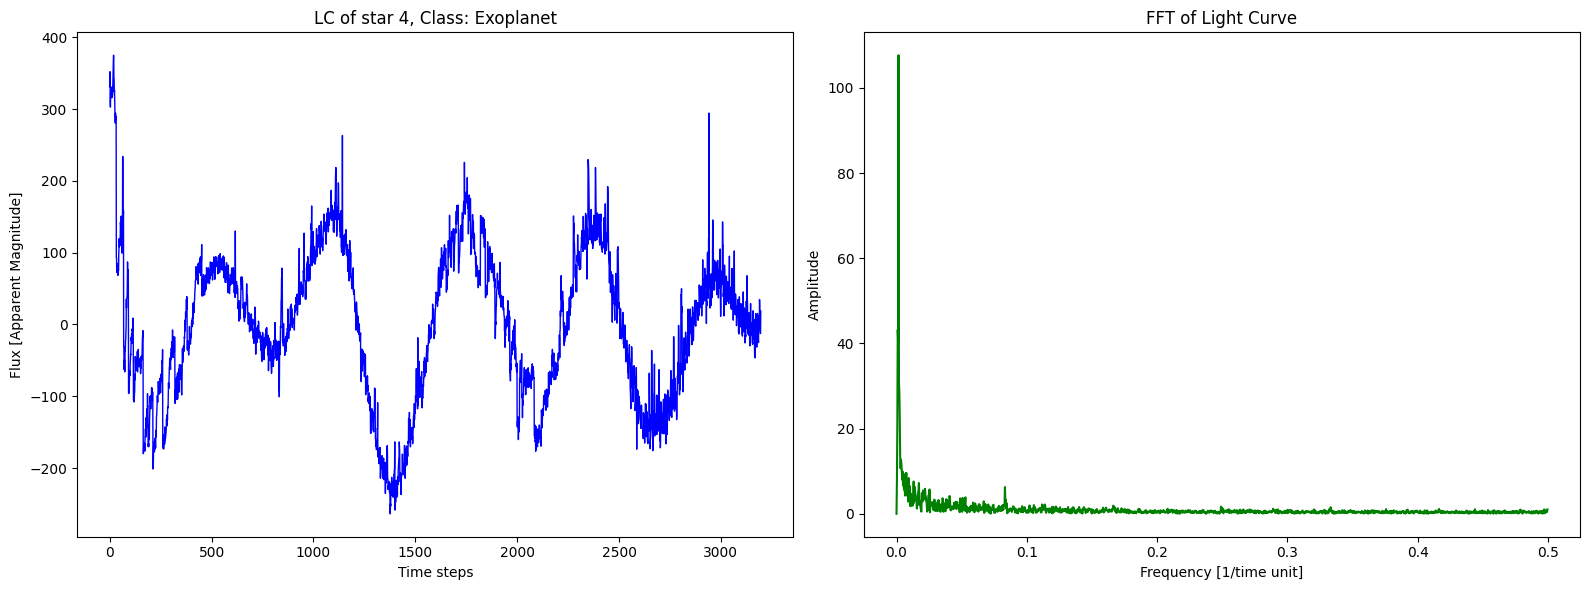

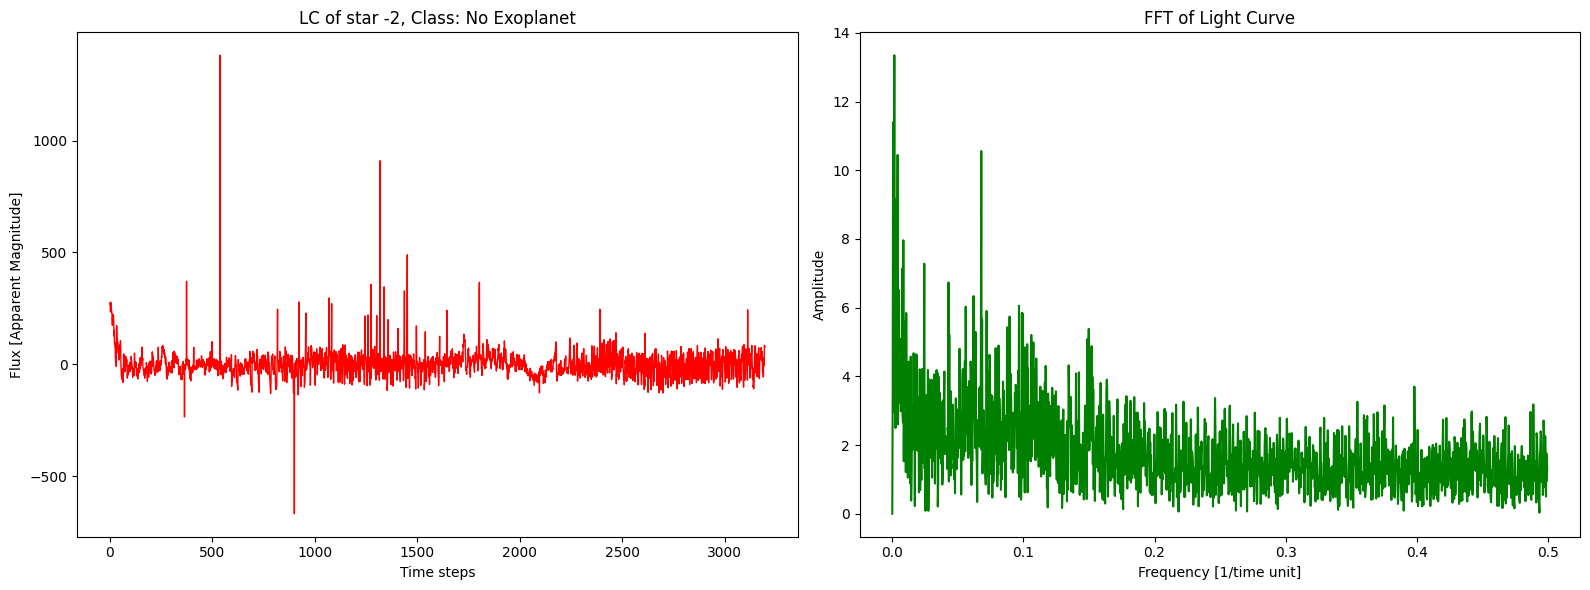

In [38]:
plot_fft_lc(df, 3) # known exoplanet

plot_fft_lc(df, -3) # known non-exoplanet

In [67]:
# We do expect this kind of behavour from the FT graphs of each. 
# An ideal exoplanet would eclipse its stellar host at a regular, observable frequency
# => our favourite star 4 (df.iloc[3] flux readings) shows a light curve that even humans can classify.

# this is cause for some preprocessing.
# 1. de-trend every row
# 2. normalise every row,
# => give each light curve mu=0, sigma=1.

df = pd.read_csv("exoData/exoTrain.csv")

# split into X, y first
X = df.drop(["LABEL"], axis=1)
y = df["LABEL"]

# since sklearn's StandardScaler works by column, we do this manually.
means = X.mean(axis=1)
stdvs = X.std(axis=1)

X = X.sub(means, axis=0).div(stdvs, axis=0)

In [68]:
print(X.shape, y.shape)

(5087, 3197) (5087,)


In [69]:
# ensure that each row meets our criteria
import random

for _ in range(10):
    j = random.randint(0, X.shape[0]-1)
    print(
        f"Testing row {j}\n Mean:", X.iloc[j].mean(), "\n Standard Deviation:", X.iloc[j].std(), "\n"
    )

Testing row 312
 Mean: 6.667589012450112e-17 
 Standard Deviation: 1.0 

Testing row 1442
 Mean: 1.493539938788825e-15 
 Standard Deviation: 0.9999999999999999 

Testing row 2913
 Mean: -2.222529670816704e-17 
 Standard Deviation: 0.9999999999999999 

Testing row 3258
 Mean: -4.445059341633408e-18 
 Standard Deviation: 1.0 

Testing row 723
 Mean: 7.556600880776793e-17 
 Standard Deviation: 1.0 

Testing row 1767
 Mean: -7.778853847858463e-17 
 Standard Deviation: 0.9999999999999999 

Testing row 2173
 Mean: -1.155715428824686e-16 
 Standard Deviation: 1.0 

Testing row 2350
 Mean: -3.556047473306726e-17 
 Standard Deviation: 0.9999999999999999 

Testing row 1970
 Mean: -3.556047473306726e-17 
 Standard Deviation: 1.0 

Testing row 831
 Mean: 8.890118683266815e-17 
 Standard Deviation: 1.0 



In [72]:
# These mean values are floating point noise, this is perfectly fine. The scaling worked.
# Now, we want to fft the data.

def FT(X):
    return np.abs(rfft(X, axis=1))

X = FT(X)

NameError: name 'rfft' is not defined